In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/Users/Tim/PycharmProjects/HOI/')

In [3]:
import numba
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from ipywidgets import IntProgress
import itertools

import matplotlib.pyplot as plt
from numpy import sign, sin, cos, pi
from numpy.random import normal, randn

In [4]:
from synthetic_data import stationary_pb_ts, nonstationary_ts_n, nonstat_egs
from HOI.preprocessings import compute_kernel, compute_kernel_n
from HOI.tests import test_independence
from HOI.statistics import compute_dHSIC_statistics

# Multiple realisations

In [123]:
np.random.seed(10)

In [124]:
d1, d2, d3 = nonstat_egs(n_sample=40, t_time=20, d=0.5, mode='case1.1', a=0.8)
kd1 = compute_kernel_n(d1)
kd2 = compute_kernel_n(d2)
kd3 = compute_kernel_n(d3)

In [125]:
dhsic = compute_dHSIC_statistics([kd1, kd2, kd3])

0.217236738853134 0.1992052341344591 0.40164465819527817


In [126]:
print(dhsic)

0.014797314792314942


In [65]:
power ={}
for d in tqdm(np.arange(0.01, 0.3, 0.015)):
    rejects = 0
    for i in np.arange(100):
        d1, d2, d3 = nonstat_egs(n_sample=100, t_time=3, d=d, mode='case2', a=1)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3],None, mode = 'permutation', n_perms=1000, alpha=0.05)
        rejects = rejects + reject
    power[f'{d:.3f}'] = rejects/100
print(power)

  0%|          | 0/20 [00:00<?, ?it/s]

{'0.010': 0.04, '0.025': 0.03, '0.040': 0.08, '0.055': 0.05, '0.070': 0.13, '0.085': 0.12, '0.100': 0.2, '0.115': 0.3, '0.130': 0.35, '0.145': 0.49, '0.160': 0.53, '0.175': 0.7, '0.190': 0.78, '0.205': 0.9, '0.220': 0.94, '0.235': 0.92, '0.250': 0.97, '0.265': 0.99, '0.280': 1.0, '0.295': 0.98}


In [18]:
power ={}
for d in tqdm(np.arange(0.01, 0.1, 0.01)):
    rejects = 0
    for i in tqdm(np.arange(100)):
        d1, d2, _, d3 = nonstationary_ts_n(n_sample=500, t_time=10, d=d, mode='case1', a=0.5, order=3)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3],None, mode = 'permutation', n_perms=1000, alpha=0.05)
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98, '0.05': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98, '0.05': 1.0, '0.060000000000000005': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98, '0.05': 1.0, '0.060000000000000005': 1.0, '0.06999999999999999': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98, '0.05': 1.0, '0.060000000000000005': 1.0, '0.06999999999999999': 1.0, '0.08': 1.0}


  0%|          | 0/100 [00:00<?, ?it/s]

{'0.01': 0.08, '0.02': 0.19, '0.03': 0.72, '0.04': 0.98, '0.05': 1.0, '0.060000000000000005': 1.0, '0.06999999999999999': 1.0, '0.08': 1.0, '0.09': 1.0}


## case1.1

In [13]:
power ={}
for d in tqdm(np.arange(0.91, 1, 0.1)):
    rejects = 0
    for i in tqdm(range(100)):
        d1, d2, d3 = nonstat_egs(n_sample=100, t_time=80, d=d, mode='case3', a=d)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3], None, n_perms = 1000, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(d)] = rejects/100
    print(power)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

{'0.91': 0.05}


In [15]:
d1, d2, d3 = nonstat_egs(n_sample=100, t_time=50, d=0, mode='case3', a=0.91)

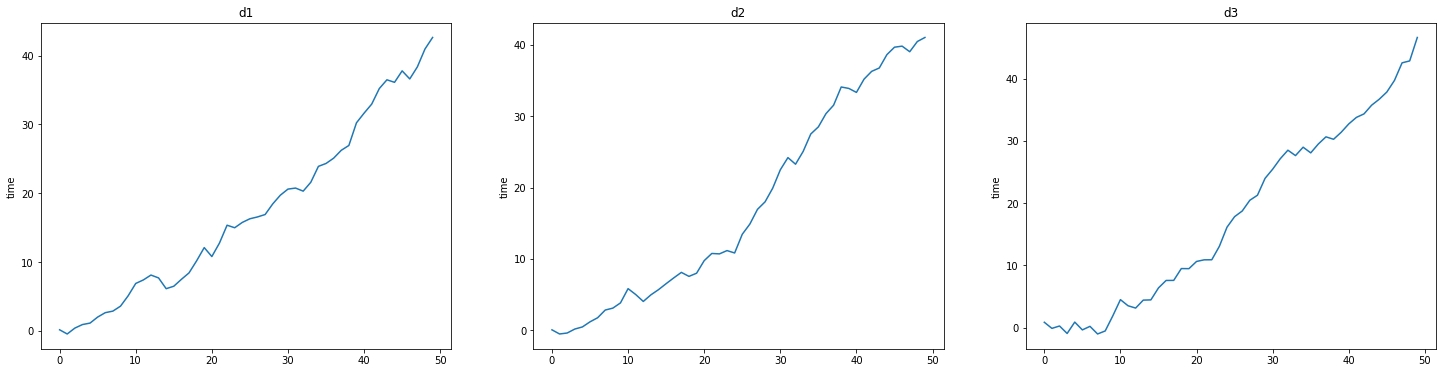

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(1, 3, 1)
plt.plot(d1[55])
plt.title('d1')
plt.ylabel('time')

plt.subplot(1, 3, 2)
plt.plot(d2[55])
plt.title('d2')
plt.ylabel('time')

plt.subplot(1, 3, 3)
plt.plot(d3[55])
plt.title('d3')
plt.ylabel('time')

plt.savefig('svg/nonstat_case3.svg', format='svg', dpi=300)
plt.show()

In [1154]:
from statsmodels.tsa.stattools import adfuller
 
# extracting only the passengers count using values function
values = d3[45,:]
 
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])

Augmneted Dickey_fuller Statistic: -1.379063
p-value: 0.592272


In [896]:
arr = np.round(d2[8,:])+np.round(d1[8,:])
n = len(arr)
countEven = 0
countodd = 0
for i in range(0, n):
    if arr[i]%2==0 :
        countEven += 1
    else:
        countodd += 1

print("Even Elements count : " )
print(countEven)

print("Odd Elements count : ")
print(countodd)

Even Elements count : 
52
Odd Elements count : 
48


In [1157]:
power ={}
for d in tqdm(np.arange(0.9, 0, -0.2)):
    rejects = 0
    for i in tqdm(range(20)):
        d1, d2, d3 = nonstat_egs(n_sample=300, t_time=50, d=d, mode='nonstat', a=0.8)
        kd1 = compute_kernel_n(d1)
        kd2 = compute_kernel_n(d2)
        kd3 = compute_kernel_n(d3)
        _, _, _, reject = test_independence([kd1, kd2, kd3], None, n_perms = 1000, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(d)] = rejects
    print(power)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

{'0.9': 20}


  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

0.0

## multiple realisation frequency mixing

In [214]:
import scipy.io
mat = scipy.io.loadmat('dependence_phases_equal_heteroskedascity_trend.mat')

In [215]:
mat['all_samples'].shape

(100, 4, 3000)

In [228]:
md1 = mat['all_samples'][0:100,0,600:720]
md2 = mat['all_samples'][0:100,1,600:720]
md3 = mat['all_samples'][0:100,2,600:720]
md4 = mat['all_samples'][0:100,3,600:720]

kmd1 = compute_kernel_n(md1)
kmd2 = compute_kernel_n(md2)
kmd3 = compute_kernel_n(md3)
kmd4 = compute_kernel_n(md4)

In [229]:
power_set = find_comb([kmd1, kmd2, kmd3, kmd4])

In [230]:
power_set_name = find_comb(['d1', 'd2', 'd3', 'd4'])

In [231]:
power = {}
for (name, klist) in tqdm(zip(power_set_name, power_set), total=len(power_set)):
    rejects = 0
    for i in tqdm(range(10)):
        _, _, _, reject = test_independence(klist, None, n_perms=1000, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(name)] = rejects
    print(power)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [147]:
power

{"['d1', 'd2']": 10,
 "['d1', 'd3']": 10,
 "['d1', 'd4']": 10,
 "['d2', 'd3']": 10,
 "['d2', 'd4']": 10,
 "['d3', 'd4']": 10,
 "['d1', 'd2', 'd3']": 10,
 "['d1', 'd2', 'd4']": 10,
 "['d1', 'd3', 'd4']": 10,
 "['d2', 'd3', 'd4']": 10,
 "['d1', 'd2', 'd3', 'd4']": 10}

In [257]:
mat = scipy.io.loadmat('dependence_phases_equal_linear_mean_and_heteroskedascity_trend.mat')

In [258]:
mat['all_samples'].shape

(100, 4, 3000)

In [263]:
md1 = mat['all_samples'][:,0,:][:,800:830]
md2 = mat['all_samples'][:,1,:][:,800:830]
md3 = mat['all_samples'][:,2,:][:,800:830]
md4 = mat['all_samples'][:,3,:][:,800:830]

kmd1 = compute_kernel_n(md1)
kmd2 = compute_kernel_n(md2)
kmd3 = compute_kernel_n(md3)
kmd4 = compute_kernel_n(md4)

In [264]:
power_set = find_comb([kmd1, kmd2, kmd3, kmd4])

In [265]:
power_set_name = find_comb(['d1', 'd2', 'd3', 'd4'])

In [266]:
power = {}
for (name, klist) in tqdm(zip(power_set_name, power_set), total=len(power_set)):
    rejects = 0
    for i in tqdm(range(10)):
        _, _, _, reject = test_independence(klist, None, n_perms=1000, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(name)] = rejects
    print(power)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10, "['d2', 'd3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10, "['d2', 'd3', 'd4']": 10, "['d1', 'd2', 'd3', 'd4']": 10}


In [154]:
power

{"['d1', 'd2']": 10,
 "['d1', 'd3']": 10,
 "['d1', 'd4']": 10,
 "['d2', 'd3']": 10,
 "['d2', 'd4']": 10,
 "['d3', 'd4']": 10,
 "['d1', 'd2', 'd3']": 10,
 "['d1', 'd2', 'd4']": 10,
 "['d1', 'd3', 'd4']": 10,
 "['d2', 'd3', 'd4']": 10,
 "['d1', 'd2', 'd3', 'd4']": 10}

In [155]:
mat = scipy.io.loadmat('dependence_phases_equal_linear_mean_trend.mat')

In [156]:
mat['all_samples'].shape

(100, 4, 3000)

In [157]:
md1 = mat['all_samples'][:,0,:][:,0:500]
md2 = mat['all_samples'][:,1,:][:,0:500]
md3 = mat['all_samples'][:,2,:][:,0:500]
md4 = mat['all_samples'][:,3,:][:,0:500]

kmd1 = compute_kernel_n(md1)
kmd2 = compute_kernel_n(md2)
kmd3 = compute_kernel_n(md3)
kmd4 = compute_kernel_n(md4)

In [158]:
power_set = find_comb([kmd1, kmd2, kmd3, kmd4])

In [159]:
power_set_name = find_comb(['d1', 'd2', 'd3', 'd4'])

In [160]:
power = {}
for (name, klist) in tqdm(zip(power_set_name, power_set), total=len(power_set)):
    rejects = 0
    for i in tqdm(range(10)):
        _, _, _, reject = test_independence(klist, None, n_perms=1000, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(name)] = rejects
    print(power)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10, "['d2', 'd3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 10, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10, "['d2', 'd3', 'd4']": 10, "['d1', 'd2', 'd3', 'd4']": 10}


In [161]:
power

{"['d1', 'd2']": 10,
 "['d1', 'd3']": 10,
 "['d1', 'd4']": 10,
 "['d2', 'd3']": 10,
 "['d2', 'd4']": 10,
 "['d3', 'd4']": 10,
 "['d1', 'd2', 'd3']": 10,
 "['d1', 'd2', 'd4']": 10,
 "['d1', 'd3', 'd4']": 10,
 "['d2', 'd3', 'd4']": 10,
 "['d1', 'd2', 'd3', 'd4']": 10}

In [165]:
mat = scipy.io.loadmat('multiple_samples_dependence.mat')

In [166]:
mat['all_samples'].shape

(80, 4, 3000)

In [181]:
md1 = mat['all_samples'][:,0,:][:,0:300]
md2 = mat['all_samples'][:,1,:][:,0:300]
md3 = mat['all_samples'][:,2,:][:,0:300]
md4 = mat['all_samples'][:,3,:][:,0:300]

kmd1 = compute_kernel_n(md1)
kmd2 = compute_kernel_n(md2)
kmd3 = compute_kernel_n(md3)
kmd4 = compute_kernel_n(md4)

In [168]:
power_set = find_comb([kmd1, kmd2, kmd3, kmd4])

In [169]:
power_set_name = find_comb(['d1', 'd2', 'd3', 'd4'])

In [139]:
power = {}
for (name, klist) in tqdm(zip(power_set_name, power_set), total=len(power_set)):
    rejects = 0
    for i in tqdm(range(10)):
        _, _, _, reject = test_independence(klist, None, n_perms=1000, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(name)] = rejects
    print(power)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 0}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 0, "['d1', 'd2', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 0, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 0, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 0, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10, "['d2', 'd3', 'd4']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 0, "['d1', 'd3']": 10, "['d1', 'd4']": 10, "['d2', 'd3']": 10, "['d2', 'd4']": 10, "['d3', 'd4']": 0, "['d1', 'd2', 'd3']": 10, "['d1', 'd2', 'd4']": 10, "['d1', 'd3', 'd4']": 10, "['d2', 'd3', 'd4']": 10, "['d1', 'd2', 'd3', 'd4']": 10}


In [140]:
power

{"['d1', 'd2']": 0,
 "['d1', 'd3']": 10,
 "['d1', 'd4']": 10,
 "['d2', 'd3']": 10,
 "['d2', 'd4']": 10,
 "['d3', 'd4']": 0,
 "['d1', 'd2', 'd3']": 10,
 "['d1', 'd2', 'd4']": 10,
 "['d1', 'd3', 'd4']": 10,
 "['d2', 'd3', 'd4']": 10,
 "['d1', 'd2', 'd3', 'd4']": 10}

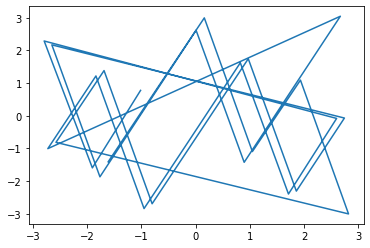

In [172]:
plt.plot(md1[0,:], md2[0,:])

In [307]:
mat = scipy.io.loadmat('lin1k.mat')

In [308]:
mat['all_samples'].shape

(1000, 4, 3000)

In [309]:
md1 = mat['all_samples'][0:500,0,450:500]
md2 = mat['all_samples'][0:500,1,450:500]
md3 = mat['all_samples'][0:500,2,450:500]
md4 = mat['all_samples'][0:500,3,450:500]
print(md1.shape)
kmd1 = compute_kernel_n(md1)
kmd2 = compute_kernel_n(md2)
kmd3 = compute_kernel_n(md3)
kmd4 = compute_kernel_n(md4)
print(kmd1.shape)

(500, 50)
(500, 500)


In [310]:
power_set = find_comb([kmd1, kmd2, kmd3, kmd4])

In [311]:
power_set_name = find_comb(['d1', 'd2', 'd3', 'd4'])

In [312]:
power = {}
for (name, klist) in tqdm(zip(power_set_name, power_set), total=len(power_set)):
    rejects = 0
    for i in tqdm(range(10)):
        _, _, _, reject = test_independence(klist, None, n_perms=300, alpha=0.05, mode = 'permutation')
        rejects = rejects + reject
    power[str(name)] = rejects
    print(power)

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

{"['d1', 'd2']": 10, "['d1', 'd3']": 10}


  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 